In [26]:
#import the necessary libraries for EDA and Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
yb_df=pd.read_csv('data_YesBank_StockPrices.csv', index_col='Date',parse_dates=True)
yb_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [28]:
#Check for missing values
yb_df.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

As we can see the above dataset does not contain any missing values. This certifies that the given dataset is consistent and is reday for an for it's first set of EDA to be performed on it.

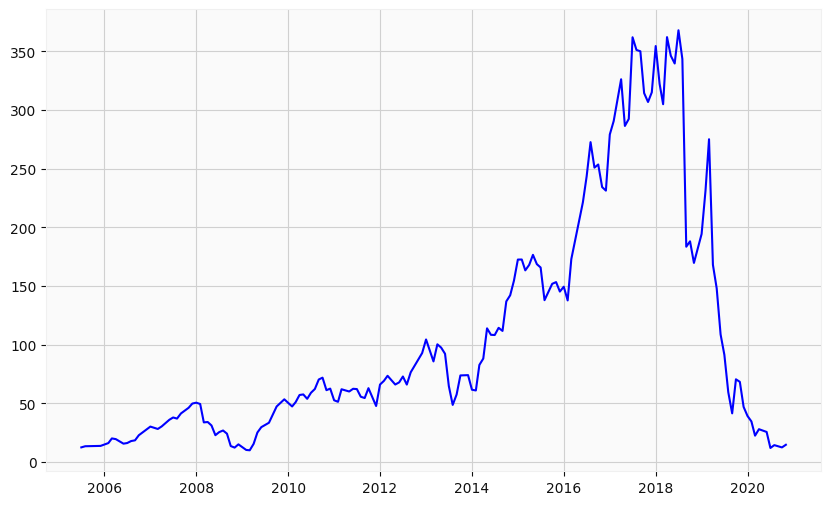

In [29]:
# Plotting the line chart
plt.figure(figsize=(10, 6))  # Set the figure size if needed
plt.plot(yb_df.index, yb_df['Close'], label='Yes Bank Stock Price', color='blue')


The line plot for the given monthly time series data for Yes Bank stock prices can help us make inferences on the trends that the stock was perusing in the period. From the end of 2005 to early 2008 the stock registered a positive outlook and an uptrend. There was a brief downtrend from early 2008 to early 2009 which can be attributed to the 2008 Sub-Prime Crisis- which wreaked havoc in the world stock market. As Yes Bank was in the banking sector it was clearly affected due to this predicament. 

After 2009 there was a persistent uptrend and the margin for short-term speculation increased for Yes Bank ever since the Reserve Bank of India(RBI) addressed its concern about the asset quality and lending practices of the bank. The period shows great volatility for Yes Bank. 

Post-2018 Yes Bank has gone through corporate restructuring and the investor sentiments regarding the fundamentals of the stocks have hit an all-time low. Hence, we saw Yes Bank lose its stock value and market share in this period. And since its loss in market share due to the negative perception built around the companies' fundamentals, it hasn't been able to recover back to its previous high levels.

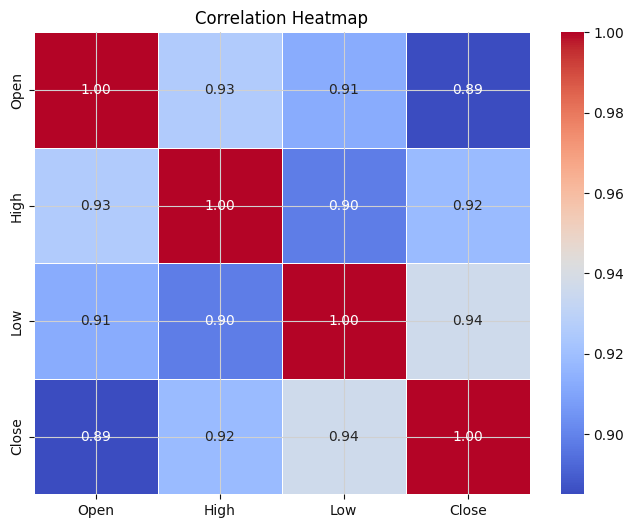

In [30]:
#Plotting the Heatmap to validate trading theories on price action.
correlation_matrix = yb_df.corr(method='kendall', numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
#Correlation Heatmap explanation MARKDOWN
#Fill Later


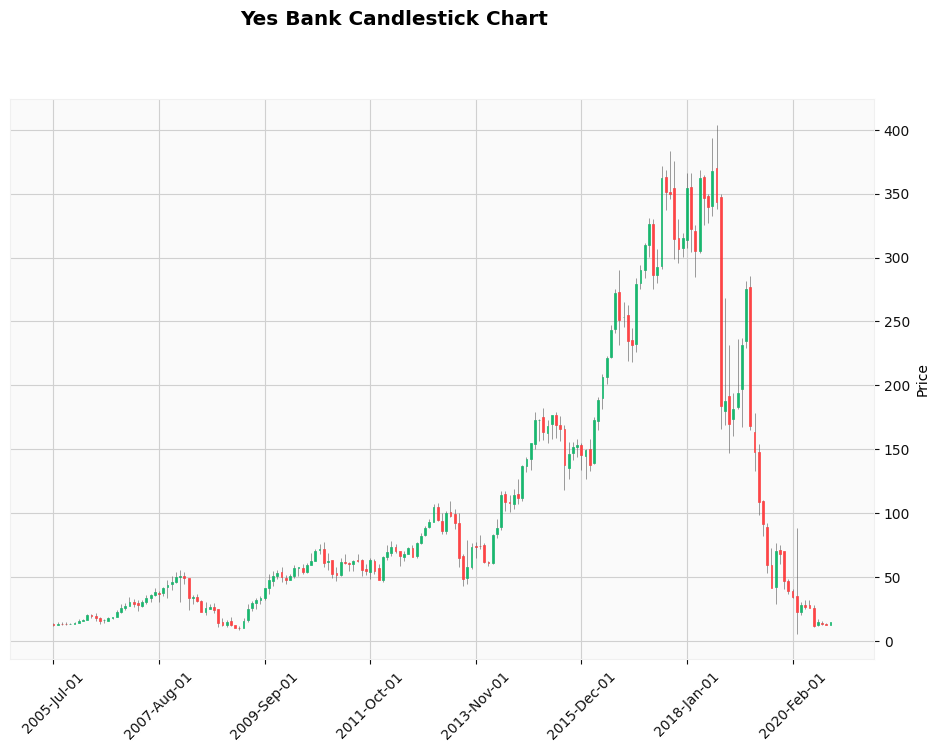

In [32]:
#Plot Candlestick Chart for Yes Bank Stock
import mplfinance as mpf
mpf.plot(yb_df, type='candle', style='yahoo', ylabel='Price', ylabel_lower='Volume', figsize=(12,8), title= 'Yes Bank Candlestick Chart')


In [ ]:
#Explain Candlestick Markdown
#Fill Later

# Feature Engineering

In [ ]:
#Explain Feature Engineering Markdown
#Add Two Features Intraday Movement and Normalised Price Position

In [42]:
yb_df['Intraday Movement']=yb_df['Close']-yb_df['Open']
yb_df['Normalised Price Position']=yb_df['Intraday Movement']/(yb_df['High']-yb_df['Low'])
yb_df['Normalised Price Position']=yb_df['Normalised Price Position'].round(2)

In [43]:
yb_df.head()

,Open,High,Low,Close,Intraday Movement,Normalised Price Position
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-0.54,-0.20
2005-08-01,12.58,14.88,12.55,13.42,0.84,0.36
2005-09-01,13.48,14.87,12.27,13.30,-0.18,-0.07
2005-10-01,13.20,14.47,12.40,12.99,-0.21,-0.10
2005-11-01,13.35,13.88,12.88,13.41,0.06,0.06


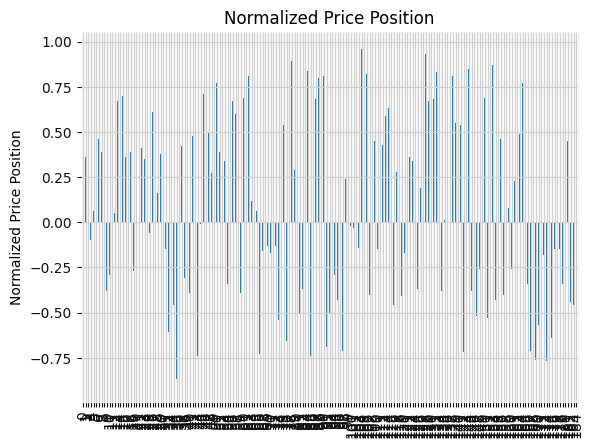

In [47]:
#Chart New Features
# Plot the 'Normalised Price Position'
yb_df['Normalised Price Position'].plot(kind='bar', title='Normalized Price Position')
plt.ylabel('Normalized Price Position')
plt.show()

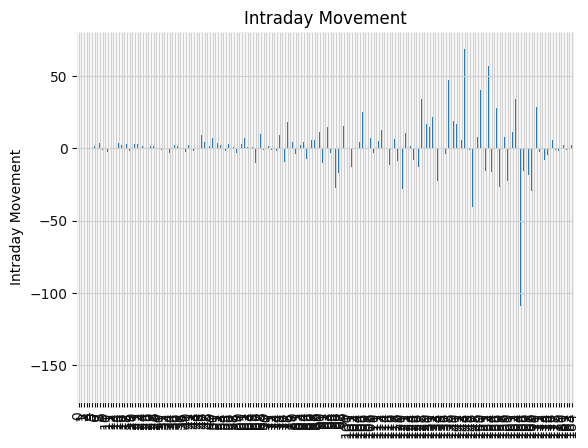

In [48]:
# Plot the 'Intraday Movement'
yb_df['Intraday Movement'].plot(kind='bar', title='Intraday Movement')
plt.ylabel('Intraday Movement')
plt.show()